***TASK 1: IMPLEMENT A K-NEAREST NEIGHNORS (K-NN) CLASSIFIER FROM SCRATCH. TEST CLASSIFIER ON THE IRIS DATASET.***



In [7]:
import numpy as np
from collections import Counter
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def euclidean_diatance(x1,x2):
    distance= np.sqrt(np.sum((x1-x2)**2))
    return distance
    
class KNN_algorithm:
    def __init__(self,k=3):
        self.k=k
    def fit_model(self,X,y):
        self.X_train=X
        self.y_train=y

    def predict(self,X):
        predictions=[self._predict(x) for x in X]
        return predictions

    def _predict(self,x):
        #compute the distance 
        distance=[euclidean_diatance(x,x_train) for x_train in self.X_train]
        # get the closet k
        k_indices=np.argsort(distance)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common= Counter(k_nearest_labels).most_common()
        return most_common[0][0]




colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
cmap=ListedColormap(colors) 
iris = datasets.load_iris()
X , y= iris.data[:, 2:4], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf= KNN_algorithm(k=5)
clf.fit_model(X_train,y_train)
predictions= clf.predict(X_test)
print (predictions)

accuracy=np.sum(predictions==y_test)/len(y_test)
print(accuracy)

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
1.0


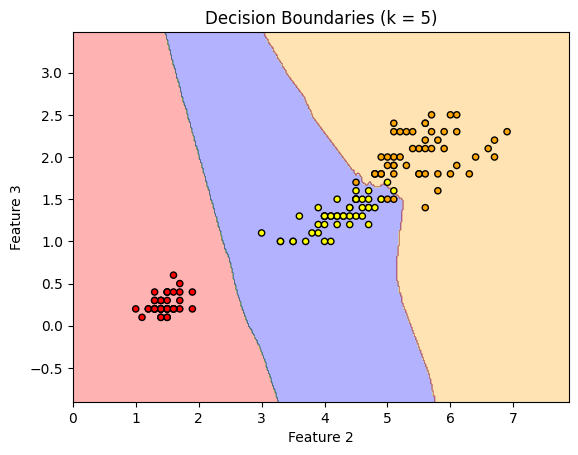

In [8]:
# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = np.array([clf._predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundaries (k = 5)")
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()


***TASK 2: TRAIN AND EVALUATE A DECISION TREE CLASSIFIER USING SCIKITLEARN. VISUALIZE
 THE TREE AND INTERPRET THE RESULTS.***

In [14]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt


In [15]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target


In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


In [19]:
from sklearn.tree import export_graphviz
from graphviz import Source
# Visualize the Decision Tree
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("D:\machine learning\internship ML\Week 2 Tasks\iris_tree")  # This will save the tree as a PDF


***TASK 3: IMPLEMENT A RANDOM FOREST CLASSIFIER. PERFORM HYPERPARAMETER TUNING USING GRIDSEARCHCV TO FIND THE OPTIMAL PARAMETERS.***

In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [11]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


In [12]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Initialize a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Find the best parameters
print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [14]:
# Use the best model found by GridSearchCV
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_rf.predict(X_test)

# Evaluate accuracy
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy:.2f}")


Best Model Accuracy: 1.00


In [15]:
# Perform cross-validation on the best model
cross_val_scores = cross_val_score(best_rf, X, y, cv=5)

# Print cross-validation scores
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Accuracy: 0.97


***Task 4: Train a Support Vector Machine (SVM) classifier on a
complex dataset. Visualize the decision boundary.***

In [16]:
# Import necessary libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


In [17]:
# Load a complex dataset (make_moons)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM Classifier with RBF kernel
svm_clf = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)



SVC(random_state=42)

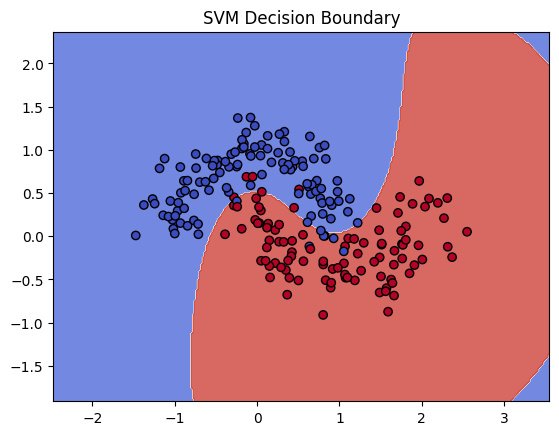

In [18]:
# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict class for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and scatter plot of data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Decision Boundary")
    plt.show()

# Plot decision boundary for the SVM classifier
plot_decision_boundary(svm_clf, X_train, y_train)


In [19]:
# Evaluate the SVM classifier on the test set
test_accuracy = svm_clf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.97


***Task 5: Compare the performance of different classifiers (logistic
regression, SVM, random forest) on a dataset using various
metrics like accuracy, precision, recall, F1-score, and ROC-AUC.***

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


In [3]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output for multi-class ROC-AUC
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Initialize classifiers
log_reg = LogisticRegression(max_iter=1000)
svm_clf = SVC(probability=True)  # Enable probability estimates for ROC-AUC calculation
rf_clf = RandomForestClassifier()

# Train the classifiers
log_reg.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [6]:
from sklearn.preprocessing import label_binarize

# Binarize the test set labels for multi-class ROC-AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict the classes
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Probabilities for ROC-AUC calculation
y_prob_log_reg = log_reg.predict_proba(X_test)
y_prob_svm = svm_clf.predict_proba(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)
# Define the evaluation function
def evaluate_model(y_test, y_pred, y_prob, classifier_name):
    print(f"\n{classifier_name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}")
    
    # ROC-AUC for multi-class classification (one-vs-rest) on the test set
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    print(f"ROC-AUC: {roc_auc:.2f}")

# Evaluate each classifier
evaluate_model(y_test, y_pred_log_reg, y_prob_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, y_prob_svm, "SVM")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")



Logistic Regression Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00

SVM Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00

Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00


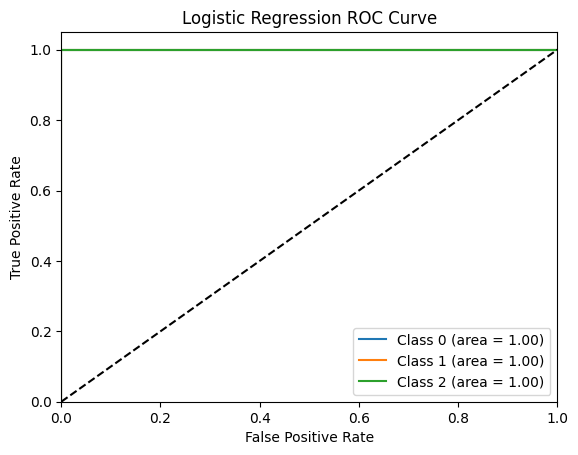

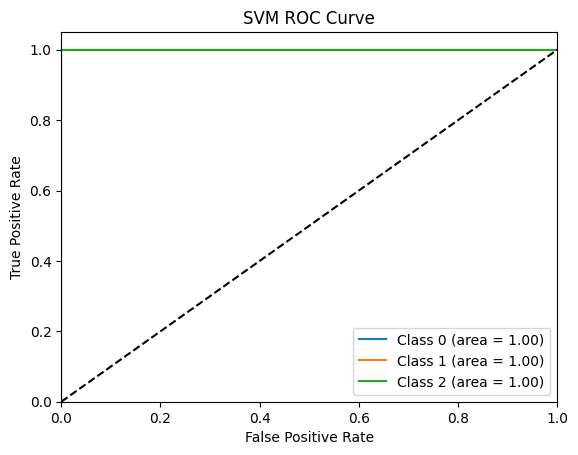

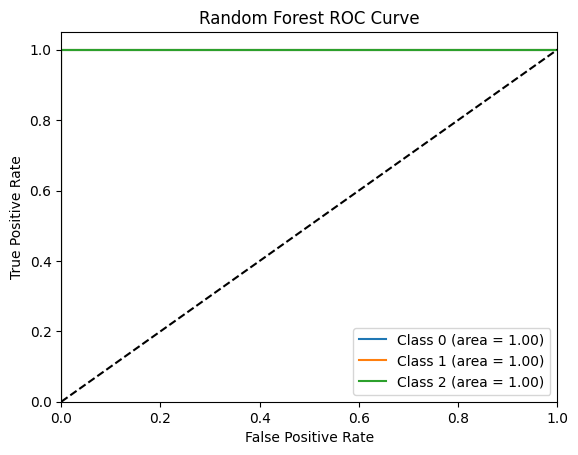

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for multi-class classification
def plot_roc_curve(y_test_bin, y_prob, classifier_name):
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    # Number of classes
    n_classes = y_test_bin.shape[1]
    
    # Calculate ROC curve and ROC AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curve for each class
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for each classifier
plot_roc_curve(y_test_bin, y_prob_log_reg, "Logistic Regression")
plot_roc_curve(y_test_bin, y_prob_svm, "SVM")
plot_roc_curve(y_test_bin, y_prob_rf, "Random Forest")
